In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/RBC_baseline.csv")
raw_data.head()

,y,c,k,l,z,ghat,r,w,invest,log_y,log_k,log_c,log_l,log_w,log_invest
0,0.058792,0.204389,10.093075,0.263316,-0.808392,0.794391,0.007135,0.548420,-0.528036,-0.899017,2.314573,-1.202185,-1.310736,0.011241,-4.361211
1,-0.216229,0.037528,9.112326,0.269759,-1.060696,1.310457,-0.017105,-0.051411,-0.746184,-1.161999,2.224398,-1.494307,-1.291212,-0.271264,-5.195605
2,0.424798,0.095246,8.617635,0.382944,-0.647774,1.858626,0.072140,0.521823,-0.279708,-0.549035,2.178914,-1.393260,-0.948227,-0.001285,-3.411383
3,-0.109370,-0.046612,7.759290,0.324919,-1.025741,1.793991,0.013082,-0.189365,-0.658241,-1.059818,2.099994,-1.641609,-1.124058,-0.336237,-4.859233
4,0.076623,-0.010884,7.089105,0.350412,-0.873605,1.705744,0.045673,0.024232,-0.489169,-0.881967,2.038374,-1.579060,-1.046807,-0.235638,-4.212549


In [3]:
print(raw_data.columns.to_list())

['y', 'c', 'k', 'l', 'z', 'ghat', 'r', 'w', 'invest', 'log_y', 'log_k', 'log_c', 'log_l', 'log_w', 'log_invest']


In [4]:
column_mapping = {
    "y": "Output",
    "c": "Consumption",
    "k": "Capital",
    "l": "Hours Worked",
    "z": "Total Factor Productivity",
    "ghat": "Government Spending",
    "r": "Annualized Interest Rate",
    "w": "Real Wage",
    "invest": "Investment",
    "log_y": "Log Output",
    "log_k": "Log Capital Stock",
    "log_c": "Log Consumption",
    "log_l": "Log Labor",
    "log_w": "Log Real Wage",
    "log_invest": "Log Investment"
}

# Предположим, что df — это ваш датафрейм
raw_data = raw_data.rename(columns=column_mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Consumption')
print(idx)

     Output  Consumption    Capital  Hours Worked  Total Factor Productivity  \
0  0.058792     0.204389  10.093075      0.263316                  -0.808392   
1 -0.216229     0.037528   9.112326      0.269759                  -1.060696   
2  0.424798     0.095246   8.617635      0.382944                  -0.647774   
3 -0.109370    -0.046612   7.759290      0.324919                  -1.025741   
4  0.076623    -0.010884   7.089105      0.350412                  -0.873605   

   Government Spending  Annualized Interest Rate  Real Wage  Investment  \
0             0.794391                  0.007135   0.548420   -0.528036   
1             1.310457                 -0.017105  -0.051411   -0.746184   
2             1.858626                  0.072140   0.521823   -0.279708   
3             1.793991                  0.013082  -0.189365   -0.658241   
4             1.705744                  0.045673   0.024232   -0.489169   

   Log Output  Log Capital Stock  Log Consumption  Log Labor  Log Re

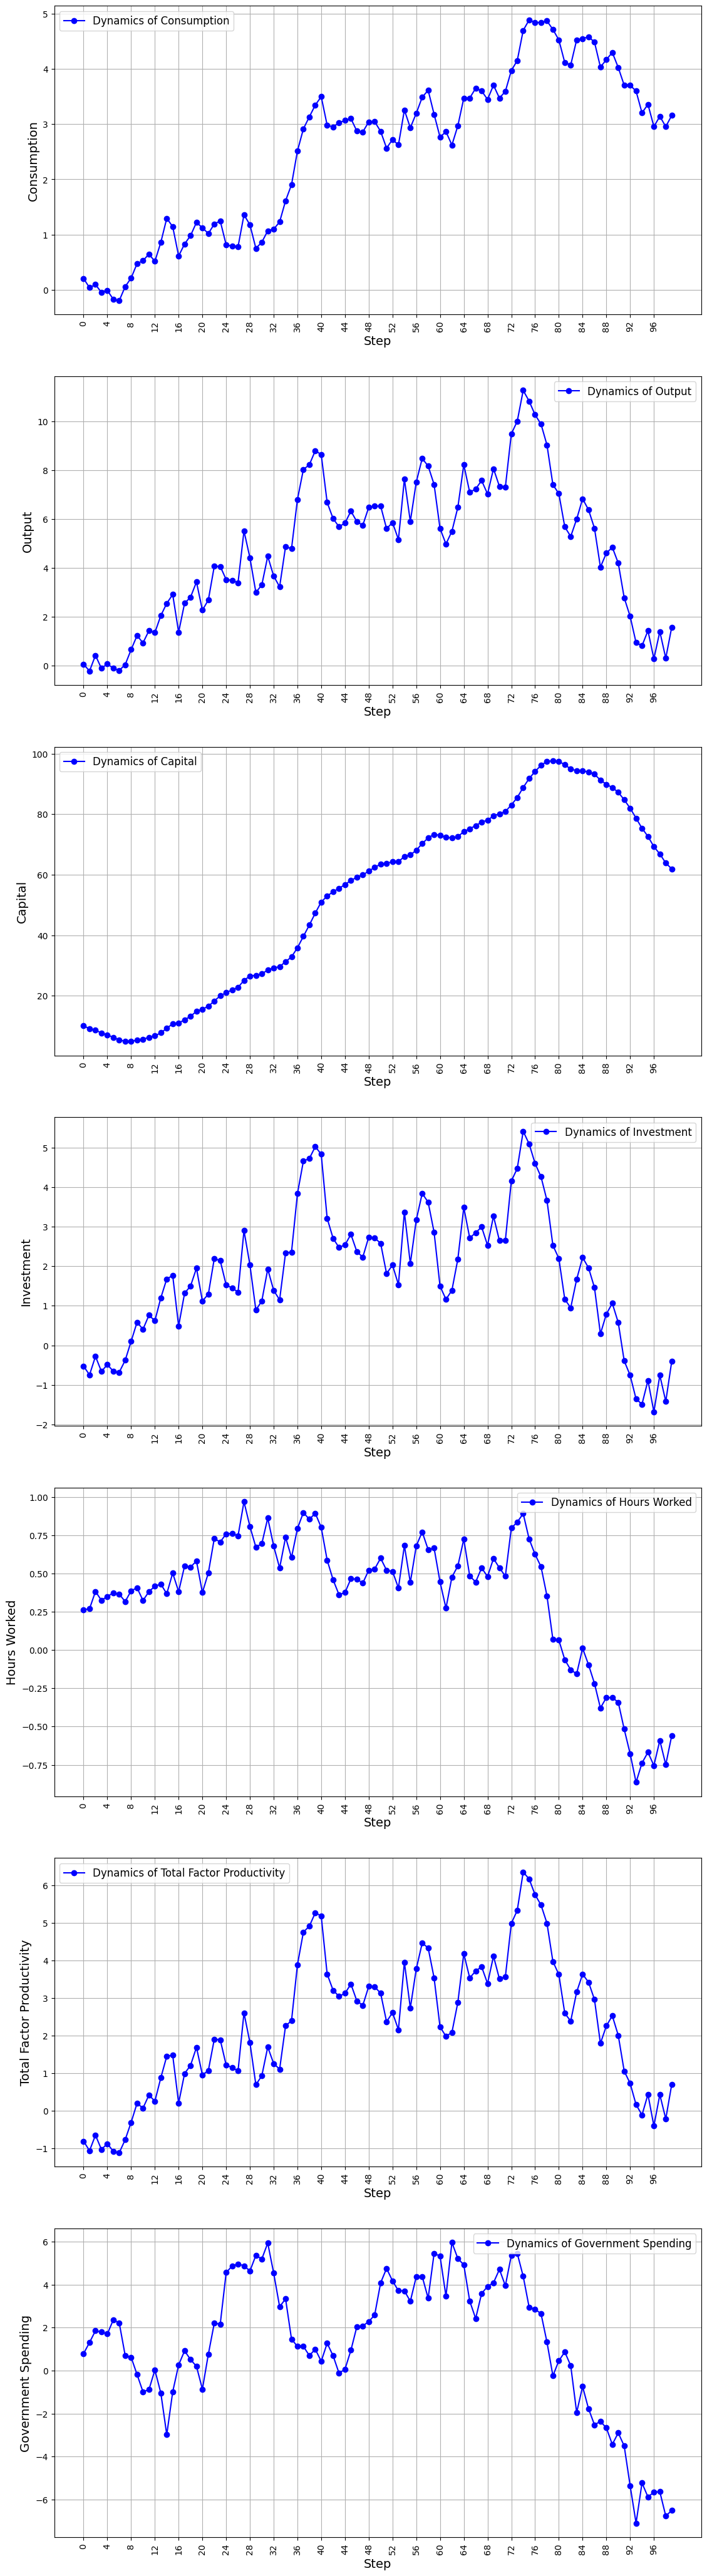

In [7]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Output", "Capital", "Investment", "Hours Worked", "Total Factor Productivity", "Government Spending"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)
